### Info
* Apple Stock Data had been collected from Date **2016-07-28** to **2021-07-26**

### Steps to collect the data::
**step-1:** Create an Account at <a href="https://www.tiingo.com/"> Tiingo</a> and Login.

**step-2:** Go <a href="https://api.tiingo.com/documentation/general/overview"> here</a> and copy your ``Api Token``

**step-3:** Initialize your Api key to the ``key`` variable down below and follow the below steps.

### Collect Stock Data

In [5]:
import pandas_datareader as pdr

In [28]:
key = ### YOUR TIINGO API KEY 

In [30]:
data = pdr.get_data_tiingo('AAPL', api_key= key)
data.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2016-07-28 00:00:00+00:00  104.34  104.45  102.82  102.83  39869839   
       2016-07-29 00:00:00+00:00  104.21  104.55  103.68  104.19  27733688   
       2016-08-01 00:00:00+00:00  106.05  106.15  104.41  104.41  38167871   
       2016-08-02 00:00:00+00:00  104.48  106.07  104.00  106.05  33816556   
       2016-08-03 00:00:00+00:00  105.79  105.84  104.77  104.81  30202641   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2016-07-28 00:00:00+00:00  24.364793  24.390480  24.009853  24.012188   
       2016-07-29 00:00:00+00:00  24.334436  24.413831  24.210674  24.329766   
       2016-08-01 00:00:00+00:00  24.764101  24.787452  24.381139  24.381139   
       2016-08-02 00:00:00+00:00  24.397485  24.768771  24.285399  24.764101   
       2016-08-03 00:00:00+00:00  24.703388  24.715063  24.465204  24.474544   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2016-07-28 00:00:00+00:00  159479356      0.0          1.0  
       2016-07-29 00:00:00+00:00  110934752      0.0          1.0  
       2016-08-01 00:00:00+00:00  152671484      0.0          1.0  
       2016-08-02 00:00:00+00:00  135266224      0.0          1.0  
       2016-08-03 00:00:00+00:00  120810564      0.0          1.0

In [35]:
data.to_csv('datasets/Apple Stock Price.csv')

### Code Implementation

**Table of Contents**
1.  [Load Data](#load)
2.  [Train Test Split](#split)
3.  [Data Sequencing](#seq)
4.  [MinMax Scaling](#scale)
5.  [Reshape into 3D data](#reshape)
6.  [Model Creation](#model)
7.  [Load Saved Model](#ld_saved)
8.  [Analyse RMSE](#rmse)
9.  [Plotting Results](#results)
10. [Forecast on future 30 days](#forecast)

<a id='load'></a>
### Load Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/Apple Stock Price.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-07-28 00:00:00+00:00,104.34,104.45,102.82,102.83,39869839,24.364793,24.390480,24.009853,24.012188,159479356,0.0,1.0
1,AAPL,2016-07-29 00:00:00+00:00,104.21,104.55,103.68,104.19,27733688,24.334436,24.413831,24.210674,24.329766,110934752,0.0,1.0
2,AAPL,2016-08-01 00:00:00+00:00,106.05,106.15,104.41,104.41,38167871,24.764101,24.787452,24.381139,24.381139,152671484,0.0,1.0
3,AAPL,2016-08-02 00:00:00+00:00,104.48,106.07,104.00,106.05,33816556,24.397485,24.768771,24.285399,24.764101,135266224,0.0,1.0
4,AAPL,2016-08-03 00:00:00+00:00,105.79,105.84,104.77,104.81,30202641,24.703388,24.715063,24.465204,24.474544,120810564,0.0,1.0


In [3]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-07-20 00:00:00+00:00,146.15,147.0997,142.96,143.460,96350036,146.15,147.0997,142.96,143.460,96350036,0.0,1.0
1253,AAPL,2021-07-21 00:00:00+00:00,145.40,146.1300,144.63,145.530,74993460,145.40,146.1300,144.63,145.530,74993460,0.0,1.0
1254,AAPL,2021-07-22 00:00:00+00:00,146.80,148.1950,145.81,145.935,77338156,146.80,148.1950,145.81,145.935,77338156,0.0,1.0
1255,AAPL,2021-07-23 00:00:00+00:00,148.56,148.7177,146.92,147.550,71447416,148.56,148.7177,146.92,147.550,71447416,0.0,1.0
1256,AAPL,2021-07-26 00:00:00+00:00,148.99,149.8300,147.70,148.270,72434089,148.99,149.8300,147.70,148.270,72434089,0.0,1.0


In [4]:
df.shape

(1257, 14)

In [5]:
close_df = df['close'] # this is our dependent variable for our stock price 

close_df.shape

(1257,)

In [6]:
close_df.describe()

count    1257.000000
mean      186.231333
std        72.414174
min       103.130000
25%       133.500000
50%       170.420000
75%       209.680000
max       506.090000
Name: close, dtype: float64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

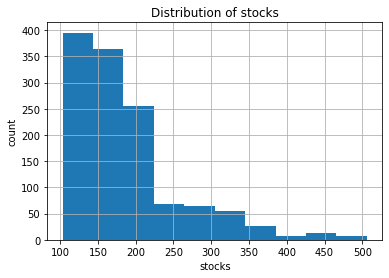

In [8]:
close_df.hist()
plt.xlabel('stocks')
plt.ylabel('count')
plt.title('Distribution of stocks')
plt.show()

* we can see that huge number of (close) stock price is between **100-200**

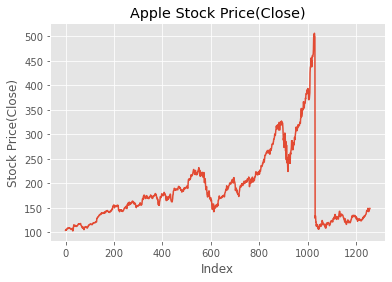

In [9]:
# graph visualisation of stock data

plt.style.use('ggplot')
plt.plot(close_df)
plt.xlabel('Index')
plt.ylabel('Stock Price(Close)')
plt.title('Apple Stock Price(Close)')
plt.show()

<a id='split'></a>
### Train Test Split

In [10]:
import numpy as np

In [11]:
# splitting dataset into trian and test

training_size = int(len(close_df) * 0.65) # 65% train size
test_size = len(close_df) - training_size # 35% test size
train_data, test_data = close_df[0:training_size], close_df[training_size:] 

In [12]:
test_data.shape

(440,)

In [13]:
train_data.shape

(817,)

<a id='seq'></a>
### Data Sequencing

In [14]:
#converting an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        a = dataset.iloc[i:(i+time_step)]
        dataX.append(a)
        dataY.append(dataset.iloc[i + time_step])
    return np.array(dataX), np.array(dataY)

In [15]:
time_step = 100
x_train ,y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [16]:
print(x_train.shape)

(717, 100)


In [17]:
print(y_train.shape)

(717,)


<a id='scale'></a>
### MinMax Scaling
* **LSTM's** are very ``sensitive`` to ``scale`` of data so we have to apply minmaxscalar()

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range= (0,1)) 
scaler_y = MinMaxScaler(feature_range= (0,1)) 

In [19]:
# fit on train data to scale down in between (0,1)

scaled_x_train = scaler_x.fit_transform(x_train)
scaled_y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))

In [20]:
# transformt the test data

scaled_x_test = scaler_x.transform(x_test)
scaled_y_test = scaler_y.transform(y_test.reshape(-1, 1))

<a id='reshape'></a>
### Reshape into 3D data

In [21]:
# reshape input into 3D in order to fit into LSTM

scaled_x_train = scaled_x_train.reshape(scaled_x_train.shape + (1,))
scaled_x_test = scaled_x_test.reshape(scaled_x_test.shape + (1,))
print(scaled_x_train.shape, scaled_x_test.shape)

(717, 100, 1) (340, 100, 1)


<a id='model'></a>
### Model Creation

In [22]:
# set the random seed to initialize the same weights at each time we train the model

import tensorflow as tf
print(tf.__version__)
tf.random.set_seed(1)

2.2.0


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(100,1))) # Lstm Layer with Input layer
model.add(LSTM(50,return_sequences = True)) # Lstm Layer-2
model.add(LSTM(50)) # Lstm Layer-3
model.add(Dense(1)) # output layer

model.compile(loss='mean_squared_error', optimizer='adam')

* while adding more than 1 **LSTM's** we should add an argument ``return_sequences = True`` until we reached last LSTM Layer.

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


#### verbose: 
        0, 1, or 2. Verbosity mode.
        0 = silent, 1 = progress bar, 2 = one line per epoch.
        Note that the progress bar is not particularly useful when
        logged to a file, so verbose=2 is recommended when not running
        interactively (eg, in a production environment).

In [26]:
# implementing early stopping and model check point 

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# stop training process if the val_loss of the train data is not decreased after 5 epochs
es = EarlyStopping(monitor= "val_loss" , min_delta= 0, patience= 5, verbose=1)

# do not save the weights until and unless the validation loss is not decreased.
mc = ModelCheckpoint(filepath= "saved models/Stacked LSTM for Apple Stocks.h5",
                     monitor="val_loss", verbose=1, save_best_only= True)

In [27]:
x_train.shape[0]/3

239.0

In [28]:
hist = model.fit(scaled_x_train, scaled_y_train, validation_data=(scaled_x_test, scaled_y_test),
                 epochs=100, batch_size=3, verbose=1, callbacks=[es,mc])

Epoch 1/100
238/239 [============================>.] - ETA: 0s - loss: 0.0096
Epoch 00001: val_loss improved from inf to 0.13344, saving model to saved models/Stacked LSTM for Apple Stocks.h5
239/239 [==============================] - 11s 44ms/step - loss: 0.0096 - val_loss: 0.1334
Epoch 2/100
238/239 [============================>.] - ETA: 0s - loss: 0.0039
Epoch 00002: val_loss improved from 0.13344 to 0.10543, saving model to saved models/Stacked LSTM for Apple Stocks.h5
239/239 [==============================] - 10s 40ms/step - loss: 0.0039 - val_loss: 0.1054
Epoch 3/100
239/239 [==============================] - ETA: 0s - loss: 0.0028
Epoch 00003: val_loss improved from 0.10543 to 0.08787, saving model to saved models/Stacked LSTM for Apple Stocks.h5
239/239 [==============================] - 11s 44ms/step - loss: 0.0028 - val_loss: 0.0879
Epoch 4/100
239/239 [==============================] - ETA: 0s - loss: 0.0020
Epoch 00004: val_loss improved from 0.08787 to 0.07478, saving mo

In [29]:
# list all data in history
print(hist.history.keys())  #loss and accuracy belongs to input

dict_keys(['loss', 'val_loss'])


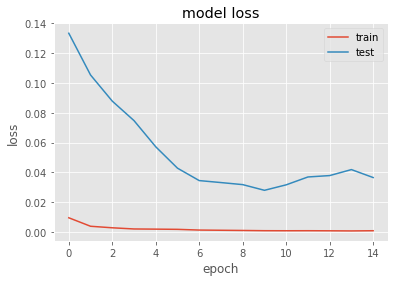

In [30]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


<a id='ld_saved'></a>
### Load Saved Model

In [31]:
from tensorflow.keras.models import load_model
Model = load_model('saved models/Stacked LSTM for Apple Stocks.h5')

In [32]:
## evaluation on train data

Model.evaluate(scaled_x_train, scaled_y_train, batch_size=1)

717/717 [==============================] - 6s 8ms/step - loss: 0.0012


0.0011547202011570334

In [33]:
## evaluation on test data

Model.evaluate(scaled_x_test, scaled_y_test, batch_size=1)

340/340 [==============================] - 3s 8ms/step - loss: 0.0280


0.028002560138702393

<a id='rmse'></a>
# Analyse RMSE

In [34]:
train_pred = Model.predict(scaled_x_train)
test_pred = Model.predict(scaled_x_test)

In [36]:
import math
from sklearn.metrics import mean_squared_error

**RMSE on scaled Data**

In [37]:
## rmse on test data
math.sqrt(mean_squared_error(scaled_y_test, test_pred))

0.16733962895536464

In [38]:
## rmse on train data
math.sqrt(mean_squared_error(scaled_y_train, train_pred))

0.033981186301246614

**RMSE on Inverse-scaled Data**

In [39]:
# Transform Prediction data back into original form

inv_train_pred = scaler_y.inverse_transform(train_pred)
inv_test_pred = scaler_y.inverse_transform(test_pred)

In [40]:
inv_train_pred.shape

(717, 1)

In [41]:
# calculate RMSE Performance metrics(Root Mean squared Error) for Train data

math.sqrt(mean_squared_error(y_train, inv_train_pred))

4.341435548465249

In [42]:
# RMSE for test data

math.sqrt(mean_squared_error(y_test, inv_test_pred))

21.379310924839917

<a id='results'></a>
### Plotting Results

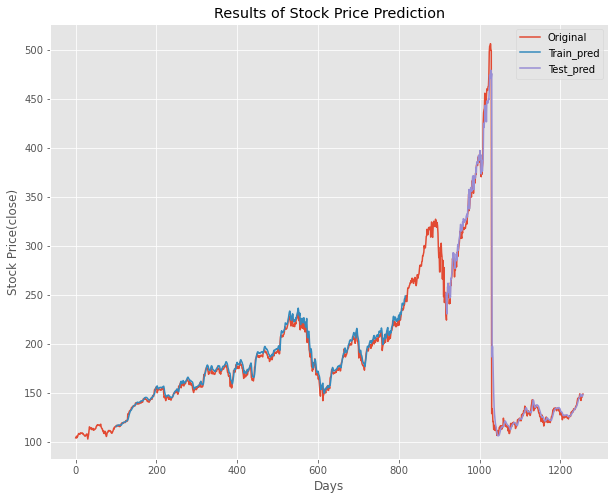

In [43]:
### Plotting 
plt.figure(figsize=(10, 8))

# shift train predictions for plotting(orange)
look_back=100
trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(inv_train_pred)+look_back] = inv_train_pred.reshape(inv_train_pred.shape[0])

# shift test predictions for plotting(green)
testPredictPlot = np.empty_like(close_df)
testPredictPlot[:] = np.nan
testPredictPlot[len(inv_train_pred)+(look_back*2):len(close_df)] = inv_test_pred.reshape(inv_test_pred.shape[0])

# plot baseline and predictions (blue)
plt.plot(close_df, label='Original')
plt.plot(trainPredictPlot, label='Train_pred')
plt.plot(testPredictPlot, label='Test_pred')

plt.title('Results of Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price(close)')
plt.legend(loc='best')
plt.show()

<a id='forecast'></a>
# Forecast on future 30 days

**Collect previous 100 days data**

In [44]:
len(y_test)

340

In [45]:
x_input = y_test[240:].reshape(1,-1)
x_input.shape

(1, 100)

In [46]:
# scale the input data
sc_x_input = scaler_y.transform(x_input)

In [47]:
temp_input = sc_x_input[0].tolist()

**predict for future 30 days**

In [48]:
n_steps = len(temp_input)
for i in range(30):
    input_ = temp_input[i:]
    input_ = np.array(input_).reshape(1, n_steps, 1)
    output = Model.predict(input_)[0][0]
    temp_input.append(output)
    

In [49]:
len(temp_input)

130

In [50]:
# collect numbers for 100 and 30 days
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [51]:
len(close_df)

1257

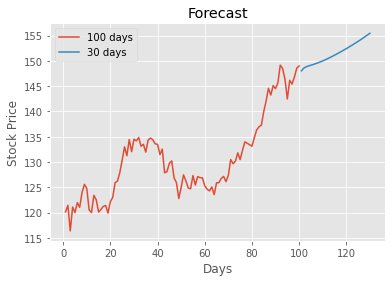

In [52]:
# Partial Plot in which Blue plot is forecast on 30 days

plt.plot(day_new, scaler_y.inverse_transform(np.array(temp_input[:100]).reshape(-1,1)), label='100 days')
plt.plot(day_pred, scaler_y.inverse_transform(np.array(temp_input[100:]).reshape(-1,1)), label='30 days')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Forecast')
plt.legend(loc='best')
plt.show()

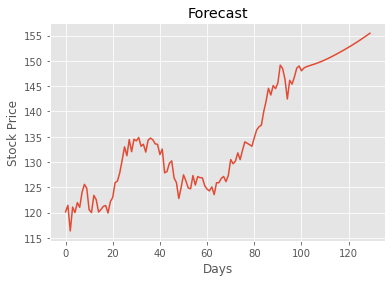

In [53]:
# Plotting the partial Forecast

plt.plot(scaler_y.inverse_transform(np.array(temp_input).reshape(-1,1)))
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Forecast')
plt.show()

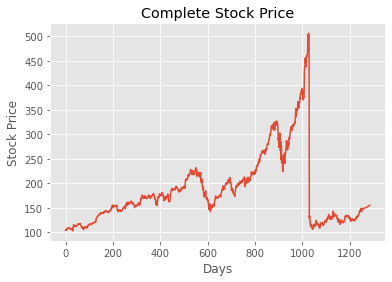

In [54]:
# plotting the complete Graph along with 30 days Forecast

stock_previous = close_df.to_numpy()
stock_30 = scaler_y.inverse_transform(np.array(temp_input[100:]).reshape(1, -1))[0]
Total_stock = np.concatenate([stock_previous, stock_30])
plt.plot(Total_stock)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Complete Stock Price')
plt.show()